In [4]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [5]:
bathy = pd.read_csv('.\TopoBathy\lb14_line060_b.xyz',sep='\t',names=['x','y','z'])
topo = pd.read_csv('.\TopoBathy\lb14_line060_t.xyz',sep=' ',names=['x','y','z'])


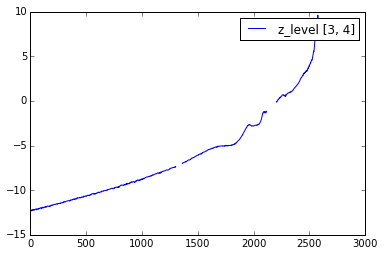

In [16]:
d_model = np.concatenate((np.sqrt((bathy.x-bathy.x[0])**2+(bathy.y-bathy.y[0])**2),
                          np.sqrt((topo.x-bathy.x[0])**2+(topo.y-bathy.y[0])**2)),
                          axis=0)
z_model = np.concatenate((bathy.z,topo.z),axis=0)
plt.plot(d_model,z_model,label='z_level '+str([3,4]))
plt.legend()
#plt.hlines(-3.5,0,3000)

(700L,)

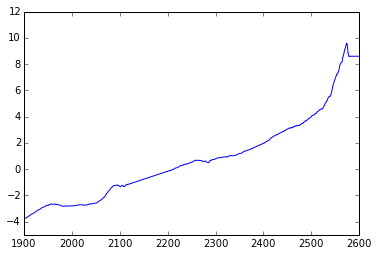

In [4]:
#remove nans and interpolate on regular intervals
np.sum(np.isnan(z_model))
#now interpolate to line
x_model= np.arange(0, 2600.0, 1)
z_model_int= np.interp(x_model,d_model[~np.isnan(z_model)],z_model[~np.isnan(z_model)])
plt.plot(x_model,z_model_int)
plt.xlim(1900,2600)
plt.ylim(-5,12)

x_model[1900:2600].shape



In [5]:
# now export x.txt, y.txt and z.txt
# let consider the 1900-2600m domain
np.savetxt('xtest.txt',x_model[1900:2600])
np.savetxt('ytest.txt',zeros(x_model[1900:2600].shape))
np.savetxt('ztest.txt',z_model_int[1900:2600])
